# ANN Online News Sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("OnlineNewsPopularity.csv")
median = df[' shares'].median()
df[' shares'] = np.where(df[' shares']>=median, 1, 0)

### Dropping features that are not required
### Dropping features that may lead to "Dummy variable trap"


In [3]:
df.drop(["url"," timedelta"],axis =1,inplace=True)
df.drop([" weekday_is_sunday"," weekday_is_saturday"," LDA_04"],axis =1,inplace=True)

In [5]:
cols = df.shape[1]

features = df.iloc[:,:cols-1]
response = df.iloc[:,cols-1:cols]

X_train, X_test, y_train, y_test = train_test_split(features,response,test_size=0.3,random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)


In [6]:
# Importing the dataset


# Encoding categorical data
#from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder_X_1 = LabelEncoder()
#X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
#labelencoder_X_2 = LabelEncoder()
#X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
#onehotencoder = OneHotEncoder(categorical_features = [1])
#X = onehotencoder.fit_transform(X).toarray()
#X = X[:, 1:]

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 28, init = 'uniform', activation = 'relu', input_dim = 55))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 28, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)

Using TensorFlow backend.


Epoch 1/20
19425/19425 [==============================] - 3s 156us/step - loss: 0.6313 - acc: 0.6441

In [7]:
from sklearn.metrics import confusion_matrix


def accuracy_NN(classifier,X,y):
    # Predicting the Test set results
    y_pred = classifier.predict(X)
    y_pred = (y_pred > 0.5)
    cm = confusion_matrix(y.values, y_pred)
    return (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [11]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))

Train accuracy = 53.68%
Test accuracy = 53.04%


# Experiment 1 

## Number of hidden layers in NN

In [ ]:
accuracy_validation = [None]*10
for NoOfHiddenLayers in range(0,10):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = 28, init = 'uniform', activation = 'relu', input_dim = 55))
    i=0
    while(i < NoOfHiddenLayers):
        classifier.add(Dense(output_dim = 28, init = 'uniform', activation = 'relu'))
        i+=1
    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 4)
    accuracy_validation[NoOfHiddenLayers]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)

Epoch 1/4
19425/19425 [==============================] - 4s 202us/step - loss: 0.6312 - acc: 0.6475

Text(0,0.5,'Accuracy on Validation Set')

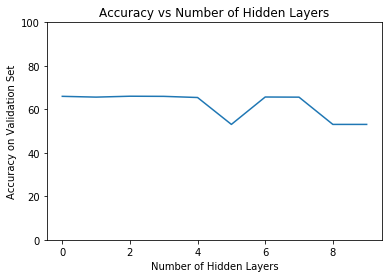

In [14]:
plt.ylim([0,100])
plt.plot(accuracy_validation)
plt.title("Accuracy vs Number of Hidden Layers")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

## As we see, Number of Hidden layers won't increase significant accuracy,
## we will keep only 1 hidden layer in the NN

# Experiment 2 
# No of Nodes in Hidden Layer

In [ ]:
accuracy_validation = [None]*10
count = 0
for NoOfNodes in range(20,30):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu', input_dim = 55))
    
    classifier.add(Dense(output_dim = NoOfNodes, init = 'uniform', activation = 'relu'))

    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 4)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

Epoch 1/4
19425/19425 [==============================] - 5s 255us/step - loss: 0.6333 - acc: 0.6428

Text(0,0.5,'Accuracy on Validation Set')

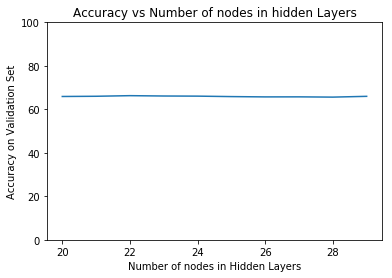

In [17]:
plt.ylim([0,100])
plt.plot(range(20,30),accuracy_validation)
plt.title("Accuracy vs Number of nodes in hidden Layers")
plt.xlabel("Number of nodes in Hidden Layers")
plt.ylabel("Accuracy on Validation Set")

## As we see from above experiment , No of layers according to our data set doesn't really change the accuracy of the validation set, 

## I will go ahead with 28 number of Nodes

## Best guess is average of output layer and no of features, that is 55+1 / 2 = 28  

# Experiment 3 

# Changing activation functions (sigmoid, tanh, etc.)

In [12]:
accuracy_validation = [None]*3
count = 0
activationFunc = ['relu','sigmoid','tanh']
for activation_Func in range(len(activationFunc)):
    
    classifier = Sequential()
    # First Layer
    classifier.add(Dense(output_dim = 21, init = 'uniform', activation = 'relu', input_dim = 55))
    
    classifier.add(Dense(output_dim = 21, init = 'uniform', activation = 'relu'))

    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = activationFunc[activation_Func]))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 4)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

Epoch 1/4
19425/19425 [==============================] - 5s 233us/step - loss: 0.7490 - acc: 0.6071

Text(0,0.5,'Accuracy on Validation Set')

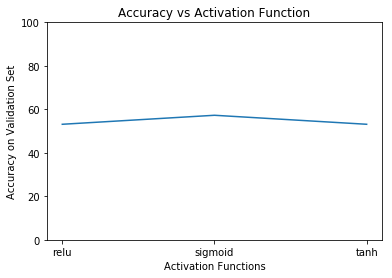

In [13]:
plt.ylim([0,100])
plt.plot(activationFunc,accuracy_validation)
plt.title("Accuracy vs Activation Function")
plt.xlabel("Activation Functions")
plt.ylabel("Accuracy on Validation Set")

## According to the experimentation on validation set,

## We will use Sigmoid activation function for the Output Layer

# Experiment 4

# Batch size for error back propagation

In [ ]:
accuracy_validation = [None]*10
count = 0
for batchSize in range(5,15):
    
    classifier = Sequential()
    classifier.add(Dense(output_dim = 21, init = 'uniform', activation = 'relu', input_dim = 55))
    classifier.add(Dense(output_dim = 21, init = 'uniform', activation = 'relu'))

    
    # Final Layer
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu'))
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    classifier.fit(X_train, y_train.values, batch_size = batchSize, nb_epoch = 3)
    accuracy_validation[count]=np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)
    count+=1

Epoch 1/3
19425/19425 [==============================] - 11s 557us/step - loss: 8.6519 - acc: 0.4632

Text(0,0.5,'Accuracy on Validation Set')

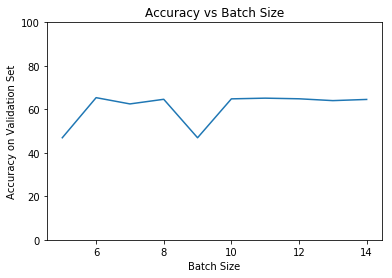

In [19]:
plt.ylim([0,100])
plt.plot(range(5,15),accuracy_validation)
plt.title("Accuracy vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy on Validation Set")

# I will stick with Batch size = 10

# Final NN after doing Hyper parameter tuning 

In [26]:
# Final NNclassifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 28, init = 'uniform', activation = 'relu', input_dim = 55))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 28, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train.values, batch_size = 10, nb_epoch = 20)

Epoch 1/20
19425/19425 [==============================] - 7s 340us/step - loss: 0.6367 - acc: 0.6410

In [28]:
print('Train accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_test, y_test) * 100, 2)))
print('Validation accuracy = {0}%'.format(np.round(accuracy_NN(classifier,X_val, y_val) * 100, 2)))

Train accuracy = 69.23%
Test accuracy = 65.65%
Validation accuracy = 53.13%
